 ### Option 1: Load CIFAR 10 (Locally) using load_cifar_10.py file

In [ ]:
#Import libraries
from tensorflow.keras.datasets import cifar10
import numpy as np 
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#Data Loading
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
#Scaling Image Pixel Values
x_train= x_train/255
x_test= x_test/255

In [ ]:
#Reshaping X train & Test for converting 4D array to 2D
X_train = x_train.reshape(50000,-1)
X_test = x_test.reshape(10000,-1)

In [ ]:
#One Hot Encoding of target variable
Y_train=OneHotEncoder().fit_transform(y_train).toarray()
Y_test=OneHotEncoder().fit_transform(y_test).toarray()
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
#Printing shapes after transforming X train/test and Y train/test
print('X_train Shape: ', X_train.shape)
print('X_test Shape: ', X_test.shape)

print('Y_train Shape: ', Y_train.shape)
print('Y_test Shape: ', Y_test.shape)

X_train Shape:  (50000, 3072)
X_test Shape:  (10000, 3072)
Y_train Shape:  (50000, 10)
Y_test Shape:  (10000, 10)


In [ ]:
#Initialization of Variables
learningrate = 0.225
epochs = 3000
weights1 = np.random.randn(3072,150)
weights2 = np.random.randn(150,10)
bias1 = np.random.randn(1,150)
bias2 = np.random.randn(1,10)
costloss=[]
costlossTest=[]
accuracytrack=[]
accuracytrackTest=[]

In [ ]:
# Reshaping X_train and initializing it to X variable
X= X_train.reshape(x_train.shape[0],-1)
X.shape

(50000, 3072)

In [ ]:
#Defining Softmax
def softmax(z):
   diff = z - np.max(z)
   diff= np.round(diff,decimals=4)
   e_x = np.exp(diff)
   sum = np.sum(e_x,axis=1, keepdims=True)
   divide = e_x / sum
   divide = np.maximum(divide,0.0001)
   divide = np.minimum(divide,0.9999)
   return divide

In [ ]:
#Defining Sigmoid 
def sigmoid(z):
  e_x = np.exp(-z)
  e_x=1/(1 + e_x) 
  divide = np.maximum(e_x,0.0001)
  divide = np.minimum(e_x,0.9999)
  return divide

In [11]:
#Training a Neural Network with 1 hidden layer using Gradient Descent Algorithm
i=0
for a in range(epochs):
  inner_activation = sigmoid(np.dot(X,weights1)+bias1)                                    # Sigmoid activation for hidden layer
  inner_activation_test= sigmoid(np.dot(X_test,weights1)+bias1)
  ypred= softmax(np.dot(inner_activation,weights2) + bias2)                               # Genesis equation ˆy = SM(W2.(W1X +b1)+b2) for Train
  ypred_test= softmax(np.dot(inner_activation_test,weights2) + bias2)                     # Genesis for Test  
  costloss.append(-np.sum(Y_train*np.log(ypred))/x_train.shape[0])                        # Categorical Cross Entropy Loss for Train dataset
  costlossTest.append(-np.sum(Y_test*np.log(ypred_test))/X_test.shape[0])                 # Categorical Cross Entropy Loss for Test dataset
  accuracytrack.append(np.mean(np.argmax(ypred,axis=1)==np.argmax(Y_train,axis=1)))       # Calculating Accuracy for Train dataset
  accuracytrackTest.append(np.mean(np.argmax(ypred_test,axis=1)==np.argmax(Y_test,axis=1)))  # Calculating Accuracy for Test dataset
  deltaW2=np.dot(inner_activation.T,(ypred-Y_train))/x_train.shape[0]                     # Backpropogation begins
  weights2=weights2-learningrate*deltaW2                                                  # Updating w2
  deltab2=np.sum(ypred-Y_train,axis=0)/x_train.shape[0]
  deltab2=deltab2.reshape(1,10)
  bias2=bias2 - learningrate*deltab2                                                      # Updating bias2
  z=inner_activation*(1-inner_activation)
  deltaw1=np.dot(X.T,np.multiply(z,np.dot((ypred-Y_train),weights2.T)))/x_train.shape[0]
  weights1=weights1-learningrate*deltaw1                                                  # Updating w1
  deltab1=np.sum(np.multiply(z,np.dot((ypred-Y_train),weights2.T)),axis=0)/x_train.shape[0]
  deltab1=deltab1.reshape(1,150)
  bias1=bias1 - learningrate*deltab1                                                      # Updating bias1
  print(i)
  i=i+1
  

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [12]:
#Accuracy for training and testing data using SLA
accuracy_score_train= np.mean(np.argmax(ypred,axis=1)==np.argmax(Y_train,axis=1))*100
accuracy_score_test= np.mean(np.argmax(ypred_test,axis=1)==np.argmax(Y_test,axis=1))*100
print("Accuracy for training data using NN with 1 hidden layer is:",accuracy_score_train,"%")
print("Accuracy for testing data using NN with 1 hidden layer is:",accuracy_score_test,"%")

Accuracy for training data using NN with 1 hidden layer is: 31.019999999999996 %
Accuracy for testing data using NN with 1 hidden layer is: 29.909999999999997 %


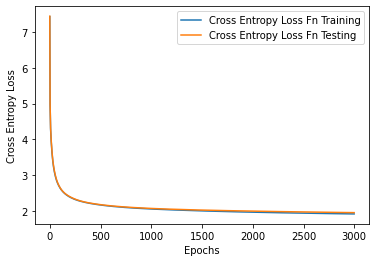

In [13]:
#Evaluation of SLA by tuning Tune-Hyperparameters
#Training and Testing Cost vs Number of Epochs
import matplotlib.pyplot as plt
plt.plot(costloss,  label="Cross Entropy Loss Fn Training")
plt.plot(costlossTest,  label="Cross Entropy Loss Fn Testing")
plt.xlabel("Epochs")
plt.ylabel("Cross Entropy Loss")
plt.legend()

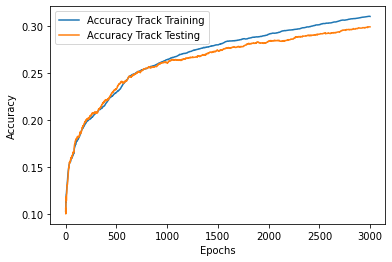

In [14]:
# Training and Testing Accuracy vs Number of Epochs
plt.plot(accuracytrack,  label="Accuracy Track Training")
plt.plot(accuracytrackTest,  label="Accuracy Track Testing")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [15]:
#Printing Confusion Matrix b/w Ytest and Ypred test
from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(np.argmax(Y_test,axis=1), np.argmax(ypred_test,axis=1))
print("Confusion Matrix b/w Ytest and Ypred test\n",matrix)

Confusion Matrix b/w Ytest and Ypred test
 [[387  50  76  36  30  33  27  48 243  70]
 [ 95 325  24  32  25  49  53  56 143 198]
 [136  36 215  64 132 102 135  80  64  36]
 [ 77  84  84 167  62 180 142  94  54  56]
 [ 74  33 159  46 220  94 181 112  48  33]
 [ 63  36 129 125  86 226 163  88  61  23]
 [ 30  52 105  95 121 112 333  95  21  36]
 [ 72  62 122  80 112  63 114 216  56 103]
 [158  93  32  20   5  43  21  19 518  91]
 [ 78 185  17  38  14  32  36  68 148 384]]
